In [1]:
%pylab inline

import numpy as np
import seaborn as sns
import random

from IPython.core import page
page.page = print

Populating the interactive namespace from numpy and matplotlib


In [10]:
#!/usr/bin/env python

# -----------------------------------------------------------------------------
# This work is licensed under the Creative Commons
# Attribution-NonCommercial-ShareAlike 4.0 International License. To view a
# copy of this license, visit
# http://creativecommons.org/licenses/by-nc-sa/4.0/.
# -----------------------------------------------------------------------------
from __future__ import division
import random

import numpy as np
import pandas as pd
import scipy as sp
import tabulate
from scipy.cluster.hierarchy import to_tree
import skbio
from skbio import Sequence, DNA, TabularMSA, TreeNode, DistanceMatrix
from skbio.alignment import local_pairwise_align_ssw


blosum50 = {'A': {'A': 5, 'C': -1, 'D': -2, 'E': -1, 'F': -3, 'G': 0, 'H': -2, 'I': -1, 'K': -1, 'L': -2, 'M': -1, 'N': -1, 'P': -1, 'Q': -1, 'R': -2, 'S': 1, 'T': 0, 'V': 0, 'W': -3, 'Y': -2},
'C': {'A': -1, 'C': 13, 'D': -4, 'E': -3, 'F': -2, 'G': -3, 'H': -3, 'I': -2, 'K': -3, 'L': -2, 'M': -2, 'N': -2, 'P': -4, 'Q': -3, 'R': -4, 'S': -1, 'T': -1, 'V': -1, 'W': -5, 'Y': -3},
'D': {'A': -2, 'C': -4, 'D': 8, 'E': 2, 'F': -5, 'G': -1, 'H': -1, 'I': -4, 'K': -1, 'L': -4, 'M': -4, 'N': 2, 'P': -1, 'Q': 0, 'R': -2, 'S': 0, 'T': -1, 'V': -4, 'W': -5, 'Y': -3},
'E': {'A': -1, 'C': -3, 'D': 2, 'E': 6, 'F': -3, 'G': -3, 'H': 0, 'I': -4, 'K': 1, 'L': -3, 'M': -2, 'N': 0, 'P': -1, 'Q': 2, 'R': 0, 'S': -1, 'T': -1, 'V': -3, 'W': -3, 'Y': -2},
'F': {'A': -3, 'C': -2, 'D': -5, 'E': -3, 'F': 8, 'G': -4, 'H': -1, 'I': 0, 'K': -4, 'L': 1, 'M': 0, 'N': -4, 'P': -4, 'Q': -4, 'R': -3, 'S': -3, 'T': -2, 'V': -1, 'W': 1, 'Y': 4},
'G': {'A': 0, 'C': -3, 'D': -1, 'E': -3, 'F': -4, 'G': 8, 'H': -2, 'I': -4, 'K': -2, 'L': -4, 'M': -3, 'N': 0, 'P': -2, 'Q': -2, 'R': -3, 'S': 0, 'T': -2, 'V': -4, 'W': -3, 'Y': -3},
'H': {'A': -2, 'C': -3, 'D': -1, 'E': 0, 'F': -1, 'G': -2, 'H': 10, 'I': -4, 'K': 0, 'L': -3, 'M': -1, 'N': 1, 'P': -2, 'Q': 1, 'R': 0, 'S': -1, 'T': -2, 'V': -4, 'W': -3, 'Y': 2},
'I': {'A': -1, 'C': -2, 'D': -4, 'E': -4, 'F': 0, 'G': -4, 'H': -4, 'I': 5, 'K': -3, 'L': 2, 'M': 2, 'N': -3, 'P': -3, 'Q': -3, 'R': -4, 'S': -3, 'T': -1, 'V': 4, 'W': -3, 'Y': -1},
'K': {'A': -1, 'C': -3, 'D': -1, 'E': 1, 'F': -4, 'G': -2, 'H': 0, 'I': -3, 'K': 6, 'L': -3, 'M': -2, 'N': 0, 'P': -1, 'Q': 2, 'R': 3, 'S': 0, 'T': -1, 'V': -3, 'W': -3, 'Y': -2},
'L': {'A': -2, 'C': -2, 'D': -4, 'E': -3, 'F': 1, 'G': -4, 'H': -3, 'I': 2, 'K': -3, 'L': 5, 'M': 3, 'N': -4, 'P': -4, 'Q': -2, 'R': -3, 'S': -3, 'T': -1, 'V': 1, 'W': -2, 'Y': -1},
'M': {'A': -1, 'C': -2, 'D': -4, 'E': -2, 'F': 0, 'G': -3, 'H': -1, 'I': 2, 'K': -2, 'L': 3, 'M': 7, 'N': -2, 'P': -3, 'Q': 0, 'R': -2, 'S': -2, 'T': -1, 'V': 1, 'W': -1, 'Y': 0},
'N': {'A': -1, 'C': -2, 'D': 2, 'E': 0, 'F': -4, 'G': 0, 'H': 1, 'I': -3, 'K': 0, 'L': -4, 'M': -2, 'N': 7, 'P': -2, 'Q': 0, 'R': -1, 'S': 1, 'T': 0, 'V': -3, 'W': -4, 'Y': -2},
'P': {'A': -1, 'C': -4, 'D': -1, 'E': -1, 'F': -4, 'G': -2, 'H': -2, 'I': -3, 'K': -1, 'L': -4, 'M': -3, 'N': -2, 'P': 10, 'Q': -1, 'R': -3, 'S': -1, 'T': -1, 'V': -3, 'W': -4, 'Y': -3},
'Q': {'A': -1, 'C': -3, 'D': 0, 'E': 2, 'F': -4, 'G': -2, 'H': 1, 'I': -3, 'K': 2, 'L': -2, 'M': 0, 'N': 0, 'P': -1, 'Q': 7, 'R': 1, 'S': 0, 'T': -1, 'V': -3, 'W': -1, 'Y': -1},
'R': {'A': -2, 'C': -4, 'D': -2, 'E': 0, 'F': -3, 'G': -3, 'H': 0, 'I': -4, 'K': 3, 'L': -3, 'M': -2, 'N': -1, 'P': -3, 'Q': 1, 'R': 7, 'S': -1, 'T': -1, 'V': -3, 'W': -3, 'Y': -1},
'S': {'A': 1, 'C': -1, 'D': 0, 'E': -1, 'F': -3, 'G': 0, 'H': -1, 'I': -3, 'K': 0, 'L': -3, 'M': -2, 'N': 1, 'P': -1, 'Q': 0, 'R': -1, 'S': 5, 'T': 2, 'V': -2, 'W': -4, 'Y': -2},
'T': {'A': 0, 'C': -1, 'D': -1, 'E': -1, 'F': -2, 'G': -2, 'H': -2, 'I': -1, 'K': -1, 'L': -1, 'M': -1, 'N': 0, 'P': -1, 'Q': -1, 'R': -1, 'S': 2, 'T': 5, 'V': 0, 'W': -3, 'Y': -2},
'V': {'A': 0, 'C': -1, 'D': -4, 'E': -3, 'F': -1, 'G': -4, 'H': -4, 'I': 4, 'K': -3, 'L': 1, 'M': 1, 'N': -3, 'P': -3, 'Q': -3, 'R': -3, 'S': -2, 'T': 0, 'V': 5, 'W': -3, 'Y': -1},
'W': {'A': -3, 'C': -5, 'D': -5, 'E': -3, 'F': 1, 'G': -3, 'H': -3, 'I': -3, 'K': -3, 'L': -2, 'M': -1, 'N': -4, 'P': -4, 'Q': -1, 'R': -3, 'S': -4, 'T': -3, 'V': -3, 'W': 15, 'Y': 2},
'Y': {'A': -2, 'C': -3, 'D': -3, 'E': -2, 'F': 4, 'G': -3, 'H': 2, 'I': -1, 'K': -2, 'L': -1, 'M': 0, 'N': -2, 'P': -3, 'Q': -1, 'R': -1, 'S': -2, 'T': -2, 'V': -1, 'W': 2, 'Y': 8}}

nt_substitution_matrix = {'A': {'A':  1, 'C': -2, 'G': -2, 'T': -2, 'N': 0},
                          'C': {'A': -2, 'C':  1, 'G': -2, 'T': -2, 'N': 0},
                          'G': {'A': -2, 'C': -2, 'G':  1, 'T': -2, 'N': 0},
                          'T': {'A': -2, 'C': -2, 'G': -2, 'T':  1, 'N': 0},
                          'N': {'A':  0, 'C':  0, 'G':  0, 'T':  0, 'N': 0 }}

traceback_decoding = {1: '\\', 2:'|', 3: '-', -1: 'E', 0: '*'}
###
# pairwise alignment notebook
###

def hamming_distance(s1, s2):
    s1 = Sequence(s1)
    s2 = Sequence(s2)
    return s1.distance(s2)

def show_F(h_sequence, v_sequence, data, hide_zeros=False, nonzero_val=None):
    rows = []
    col_headers = [c.decode('UTF-8') for c in h_sequence.values]
    row_headers = [c.decode('UTF-8') for c in v_sequence.values]
    pad_headers = data.shape == (len(row_headers) + 1, len(col_headers) + 1)
    if pad_headers:
        row_headers = [" "] + row_headers
        col_headers = [" "] + col_headers
    for h, d in zip(row_headers, data):
        current_row = ["<b>%s</b>" % h]
        for e in d:
            if e == 0:
                if hide_zeros:
                    current_row.append('')
                else:
                    current_row.append(0)
            else:
                if nonzero_val is not None:
                    current_row.append(nonzero_val)
                else:
                    current_row.append(e)
        rows.append(current_row)
    return tabulate.tabulate(rows, headers=col_headers, tablefmt='html')

def show_T(h_sequence, v_sequence, data):
    if data.dtype == np.int:
        data_ = T = np.full(shape=data.shape, fill_value=" ", dtype=np.str)
        translation_table = {0: "•", 1: "↖", 2: "↑", 3: "←"}
        for i, row in enumerate(data):
            for j, value in enumerate(row):
                data_[i, j] =  translation_table[value]
    else:
        data_ = data
    return show_F(h_sequence, v_sequence, data_)

def show_substitution_matrix(headers, data):
    rows = []
    for h, d in zip(headers, data):
        current_row = ["<b>%s</b>" % h]
        for e in d:
            current_row.append(e)
        rows.append(current_row)
    return tabulate.tabulate(rows, headers=headers, tablefmt='html')

def format_dynamic_programming_matrix(seq1, seq2, matrix, cell_width=6):
    """ define a function for formatting dynamic programming matrices
    """
    lines = []

    if isinstance(seq1, TabularMSA):
        seq1 = str(seq1[0])
    if isinstance(seq2, TabularMSA):
        seq2 = str(seq2[0])
    cell_format = "%" + str(cell_width) + "s"
    line_format = cell_format * (len(seq1) + 2)
    # print seq1 (start the line with two empty strings)
    lines.append(line_format % tuple([' ',' '] + [str(s) for s in list(seq1)]))

    # iterate over the rows and print each (starting with the
    # corresponding base in sequence2)
    for row, base in zip(matrix,' ' + seq2):
        row_list = [base]
        for s in row:
            if isinstance(s, np.float):
                s = str(s)
            else:
                s = s.decode('ascii')
            row_list.append(s)
        line = line_format % tuple(row_list)
        lines.append(line)

    return '\n'.join(lines)

def format_traceback_matrix(seq1, seq2, matrix, cell_width=6):
    if isinstance(seq1, TabularMSA):
        seq1 = str(seq1[0])
    if isinstance(seq2, TabularMSA):
        seq2 = str(seq2[0])
    translated_m = np.chararray(matrix.shape)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            translated_m[i, j] = traceback_decoding[matrix[i, j]]

    return format_dynamic_programming_matrix(seq1, seq2, translated_m,
                                             cell_width)


def format_dynamic_programming_matrix_subset(seq1,seq2,matrix, cell_width=6, num_positions=10):
    """ return first num_positions x num_positions of dynamic programming matrix
    """
    lines = []
    if isinstance(seq1, TabularMSA):
        seq1 = str(seq1[0])
    if isinstance(seq2, TabularMSA):
        seq2 = str(seq2[0])
    cell_format = "%" + str(cell_width) + "s"
    line_format = cell_format * (len(seq1[:num_positions]) + 1)
    # print seq1 (start the line with two empty strings)
    lines.append(line_format % tuple([' '] + map(str,list(seq1[:num_positions]))))

    # iterate over the rows and print each (starting with the
    # corresponding base in sequence2)
    for row, base in zip(matrix[:num_positions],' ' + seq2[:num_positions]):
        lines.append(line_format % tuple([base] + map(str,row[:num_positions])))

    return '\n'.join(lines)


def generate_score_matrix(seq1,seq2,substitution_matrix):
    # Initialize a matrix to use for storing the scores
    score_matrix = []
    # Iterate over the amino acids in sequence two (which will correspond
    # to the vertical sequence in the matrix)
    for aa2 in seq2:
        # Initialize the current row of the matrix
        current_row = []
        # Iterate over the amino acids in sequence one (which will
        # correspond to the horizontal sequence in the matrix)
        for aa1 in seq1:
            # score as 1 if the bases are equal and 0 if they're not
            current_row.append(substitution_matrix[aa1][aa2])
        # append the current row to the matrix
        score_matrix.append(current_row)
    return score_matrix

##
# Needleman-Wunsch alignment
##

def generate_nw_and_traceback_matrices(seq1,seq2,gap_penalty,substitution_matrix):

    # Initialize a matrix to use for scoring the alignment and for tracing
    # back the best alignment
    nw_matrix = [[-gap_penalty * i for i in range(0,len(seq1)+1)]]
    traceback_matrix = [[None] + ['-' for i in range(0,len(seq1))]]
    # Iterate over the amino acids in sequence two (which will correspond
    # to the vertical sequence in the matrix)
    # Note that i corresponds to column numbers, as in the 'Biological Sequence
    # Analysis' example
    for i,aa2 in zip(range(1,len(seq2)+1),seq2):
        # Initialize the current row of the matrix
        current_row = [i * -gap_penalty]
        current_traceback_matrix_row = ['|']
        # Iterate over the amino acids in sequence one (which will
        # correspond to the horizontal sequence in the matrix)
        # Note that j corresponds to row numbers, as in the 'Biological Sequence
        # Analysis' example from class
        for j,aa1 in zip(range(1,len(seq1)+1),seq1):
            substitution_score = substitution_matrix[aa1][aa2]
            diag_score = (nw_matrix[i-1][j-1] + substitution_score,'\\')
            up_score = (nw_matrix[i-1][j] - gap_penalty,'|')
            left_score = (current_row[-1] - gap_penalty,'-')
            best_score = max_score_tuple(diag_score, up_score, left_score)
            current_row.append(best_score[0])
            current_traceback_matrix_row.append(best_score[1])
        # append the current row to the matrix
        nw_matrix.append(current_row)
        traceback_matrix.append(current_traceback_matrix_row)
    return nw_matrix, traceback_matrix


def nw_traceback(traceback_matrix,nw_matrix,seq1,seq2,gap_character='-'):

    aligned_seq1 = []
    aligned_seq2 = []

    current_row = len(traceback_matrix) - 1
    current_col = len(traceback_matrix[0]) - 1

    best_score = nw_matrix[current_row][current_col]

    while True:
        current_value = traceback_matrix[current_row][current_col]

        if current_value == '\\':
            aligned_seq1.append(seq1[current_col-1])
            aligned_seq2.append(seq2[current_row-1])
            current_row -= 1
            current_col -= 1
        elif current_value == '|':
            aligned_seq1.append('-')
            aligned_seq2.append(seq2[current_row-1])
            current_row -= 1
        elif current_value == '-':
            aligned_seq1.append(seq1[current_col-1])
            aligned_seq2.append('-')
            current_col -= 1
        elif current_value == None:
            break
        else:
            raise ValueError("Invalid value in traceback matrix: %s" % current_value)

    return ''.join(aligned_seq1[::-1]), ''.join(aligned_seq2[::-1]), best_score


def nw_align(seq1, seq2, gap_penalty, substitution_matrix):
    """ Perform Needleman-Wunsch alignment of seq1 and seq2
    """
    nw_matrix, traceback_matrix = generate_nw_and_traceback_matrices(
                                    seq1, seq2, gap_penalty, substitution_matrix)
    aligned_seq1, aligned_seq2, score = nw_traceback(traceback_matrix,nw_matrix,seq1,seq2)
    return aligned_seq1, aligned_seq2, score

def nw_align_nt(seq1, seq2, gap_penalty=8, substitution_matrix=nt_substitution_matrix):
    """Globally align two nucleotide seqs (Needleman-Wunsch w single gap scoring)

       Parameters
       ----------
       sequence1 : string
           The first unaligned sequence
       sequence2 : string
           The second unaligned sequence
       gap_penalty : int, float, optional
           penalty for inserting a gap (this is substracted from previous best
           alignment score, so is typically positive)
       substitution_matrix: 2D dict (or similar), optional
           lookup for substitution scores (these values are added to the
           previous best alignment score)

       Returns
       -------
       string
          The first aligned sequence
       string
          The second aligned sequence
       float
          The score of the alignment

    """
    return nw_align(seq1, seq2, gap_penalty, substitution_matrix)


##
# Smith-Waterman alignment
##


def generate_sw_and_traceback_matrices(seq1,seq2,gap_penalty,substitution_matrix):
    # Initialize a matrix to use for scoring the alignment and for tracing
    # back the best alignment
    sw_matrix = [[0 for i in range(0,len(seq1)+1)]]
    traceback_matrix = [[None] + [None for i in range(0,len(seq1))]]
    # Iterate over the amino acids in sequence two (which will correspond
    # to the vertical sequence in the matrix)
    # Note that i corresponds to column numbers, as in the 'Biological Sequence
    # Analysis' example from class
    for i,aa2 in zip(range(1,len(seq2)+1),seq2):
        # Initialize the current row of the matrix
        current_row = [0]
        current_traceback_matrix_row = [None]
        # Iterate over the amino acids in sequence one (which will
        # correspond to the horizontal sequence in the matrix)
        # Note that j corresponds to row numbers, as in the 'Biological Sequence
        # Analysis' example from class
        new_alignment_score = (0,None)
        for j,aa1 in zip(range(1,len(seq1)+1),seq1):
            substitution_score = substitution_matrix[aa1][aa2]
            diag_score = (sw_matrix[i-1][j-1] + substitution_score,'\\')
            up_score = (sw_matrix[i-1][j] - gap_penalty,'|')
            left_score = (current_row[-1] - gap_penalty,'-')
            best_score = max_score_tuple(diag_score, up_score, left_score,
                                         new_alignment_score)
            current_row.append(best_score[0])
            current_traceback_matrix_row.append(best_score[1])
        # append the current row to the matrix
        sw_matrix.append(current_row)
        traceback_matrix.append(current_traceback_matrix_row)
    return sw_matrix, traceback_matrix


def sw_traceback(traceback_matrix,sw_matrix,seq1,seq2,gap_character='-'):

    aligned_seq1 = []
    aligned_seq2 = []

    current_row = None
    current_col = None
    best_score = 0
    for i in range(len(sw_matrix[0])):
        for j in range(len(sw_matrix)):
            current_score = sw_matrix[j][i]
            if current_score > best_score:
                best_score = current_score
                current_row = j
                current_col = i

    while True:
        current_value = traceback_matrix[current_row][current_col]

        if current_value == '\\':
            aligned_seq1.append(seq1[current_col-1])
            aligned_seq2.append(seq2[current_row-1])
            current_row -= 1
            current_col -= 1
        elif current_value == '|':
            aligned_seq1.append('-')
            aligned_seq2.append(seq2[current_row-1])
            current_row -= 1
        elif current_value == '-':
            aligned_seq1.append(seq1[current_col-1])
            aligned_seq2.append('-')
            current_col -= 1
        elif current_value == None:
            break
        else:
            raise ValueError("Invalid value in traceback matrix: %s" % current_value)

    return ''.join(aligned_seq1[::-1]), ''.join(aligned_seq2[::-1]), best_score, current_col, current_row

def sw_multiple_traceback(traceback_matrix,sw_matrix,seq1,seq2,gap_character='-'):

    aligned_seq1 = []
    aligned_seq2 = []

    current_row = None
    current_col = None
    best_scores = []
    for i in range(len(sw_matrix[0])):
        for j in range(len(sw_matrix)):
            try:
                new_alignment = traceback_matrix[j+1][i+1] == None
            except IndexError:
                new_alignment = True
            if new_alignment:
                current_score = sw_matrix[j][i]
                current_row = j
                current_col = i
                best_scores.append((current_score, current_row, current_col))
    best_scores.sort()
    best_scores.reverse()

    results = []
    for current_score, current_row, current_col in best_scores[:10]:
        while True:
            current_value = traceback_matrix[current_row][current_col]

            if current_value == '\\':
                aligned_seq1.append(seq1[current_col-1])
                aligned_seq2.append(seq2[current_row-1])
                current_row -= 1
                current_col -= 1
            elif current_value == '|':
                aligned_seq1.append('-')
                aligned_seq2.append(seq2[current_row-1])
                current_row -= 1
            elif current_value == '-':
                aligned_seq1.append(seq1[current_col-1])
                aligned_seq2.append('-')
                current_col -= 1
            elif current_value == None:
                break
            else:
                raise ValueError("Invalid value in traceback matrix: %s" % current_value)
        results.append((''.join(aligned_seq1[::-1]), ''.join(aligned_seq2[::-1]), current_score, current_col, current_row))

    return results


def sw_align(sequence1, sequence2, gap_penalty, substitution_matrix):
    sw_matrix, traceback_matrix = generate_sw_and_traceback_matrices(sequence1,
                                                                 sequence2,
                                                                 gap_penalty,
                                                                 substitution_matrix)

    return sw_traceback(traceback_matrix,sw_matrix,sequence1,sequence2)


def generate_sw_and_traceback_matrices_affine_gap(seq1, seq2, gap_open_penalty, gap_extend_penalty, substitution_matrix):
    # Initialize a matrix to use for scoring the alignment and for tracing
    # back the best alignment
    sw_matrix = [[0 for i in range(0,len(seq1)+1)]]
    traceback_matrix = [[None] + [None for i in range(0,len(seq1))]]
    # Iterate over the amino acids in sequence two (which will correspond
    # to the vertical sequence in the matrix)
    # Note that i corresponds to column numbers, as in the 'Biological Sequence
    # Analysis' example from class
    for i,aa2 in zip(range(1,len(seq2)+1),seq2):
        # Initialize the current row of the matrix
        current_row = [0]
        current_traceback_matrix_row = [None]
        # Iterate over the amino acids in sequence one (which will
        # correspond to the horizontal sequence in the matrix)
        # Note that j corresponds to row numbers, as in the 'Biological Sequence
        # Analysis' example from class
        new_alignment_score = (0,None)
        for j,aa1 in zip(range(1,len(seq1)+1),seq1):
            substitution_score = substitution_matrix[aa1][aa2]
            diag_score = (sw_matrix[i-1][j-1] + substitution_score,'\\')
            if traceback_matrix[i-1][j] == '|':
                # gap extend, because the cell above was also a gap
                up_score = (sw_matrix[i-1][j] - gap_extend_penalty,'|')
            else:
                # gap open, because the cell above was not a gap
                up_score = (sw_matrix[i-1][j] - gap_open_penalty,'|')
            if current_traceback_matrix_row[-1] == '-':
                # gap extend, because the cell to the left was also a gap
                left_score = (current_row[-1] - gap_extend_penalty,'-')
            else:
                # gap open, because the cell to the left was not a gap
                left_score = (current_row[-1] - gap_open_penalty,'-')
            best_score = max_score_tuple(diag_score, up_score, left_score,
                                         new_alignment_score)
            current_row.append(best_score[0])
            current_traceback_matrix_row.append(best_score[1])
        # append the current row to the matrix
        sw_matrix.append(current_row)
        traceback_matrix.append(current_traceback_matrix_row)
    return sw_matrix, traceback_matrix

def max_score_tuple(*scores):
    return max(scores, key=lambda x: x[0])

def sw_align_affine_gap(sequence1, sequence2, gap_open_penalty, gap_extend_penalty, substitution_matrix):
    sw_matrix, traceback_matrix = generate_sw_and_traceback_matrices_affine_gap(sequence1,
                                                                 sequence2,
                                                                 gap_open_penalty,
                                                                 gap_extend_penalty,
                                                                 substitution_matrix)

    return sw_traceback(traceback_matrix,sw_matrix,sequence1,sequence2)

def sw_align_affine_gap_nt(sequence1, sequence2, gap_open_penalty=5,
                        gap_extend_penalty=2, substitution_matrix=None):
    """Locally align two nucleotide seqs (Smith-Waterman w affine gap scoring)

       Parameters
       ----------
       sequence1 : string
           The first unaligned sequence
       sequence2 : string
           The second unaligned sequence
       gap_open_penalty : int, float, optional
           penalty for opening a gap (this is substracted from previous best
           alignment score, so is typically positive)
       gap_extend_penalty : int, float, optional
           penalty for extending a gap (this is substracted from previous best
           alignment score, so is typically positive)
       substitution_matrix: 2D dict (or similar), optional
           lookup for substitution scores (these values are added to the
           previous best alignment score); default is nt_substitution_matrix

       Returns
       -------
       string
          The first aligned sequence
       string
          The second aligned sequence
       float
          The score of the alignment
       int
          The start position of the alignment in sequence 1
       int
          The start position of the alignment in sequence 2

       Examples
       --------
       >>> from iab.algorithms import sw_align_affine_gap_nt
       >>> s1 = "GCGTGCCTAAGGTATGCAAG"
       >>> s2 = "ACGTGCCTAGGTACGCAAG"
       >>> a1, a2, score, a1_start, a2_start = sw_align_affine_gap_nt(s1, s2)
       >>> print(a1)
       CGTGCCTAAGGTATGCAAG
       >>> print(a2)
       CGTGCCT-AGGTACGCAAG

    """
    if substitution_matrix is None:
        substitution_matrix = nt_substitution_matrix

    return sw_align_affine_gap(sequence1, sequence2, gap_open_penalty,
                               gap_extend_penalty, substitution_matrix)

def sw_multiple_align_affine_gap_nt(sequence1, sequence2, gap_open_penalty=5,
                        gap_extend_penalty=2,
                        substitution_matrix=nt_substitution_matrix):
    sw_matrix, traceback_matrix = generate_sw_and_traceback_matrices_affine_gap(sequence1,
                                                                 sequence2,
                                                                 gap_open_penalty,
                                                                 gap_extend_penalty,
                                                                 substitution_matrix)

    return sw_multiple_traceback(traceback_matrix,sw_matrix,sequence1,sequence2)

def sw_align_affine_gap_pr(sequence1, sequence2, gap_open_penalty=11,
                        gap_extend_penalty=1,
                        substitution_matrix=blosum50):
    """Locally align two protein seqs (Smith-Waterman w affine gap scoring)

       Parameters
       ----------
       sequence1 : string
           The first unaligned sequence
       sequence2 : string
           The second unaligned sequence
       gap_open_penalty : int, float, optional
           penalty for opening a gap (this is substracted from previous best
           alignment score, so is typically positive)
       gap_extend_penalty : int, float, optional
           penalty for extending a gap (this is substracted from previous best
           alignment score, so is typically positive)
       substitution_matrix: 2D dict (or similar), optional
           lookup for substitution scores (these values are added to the
           previous best alignment score)

       Returns
       -------
       string
          The first aligned sequence
       string
          The second aligned sequence
       float
          The score of the alignment
       int
          The start position of the alignment in sequence 1
       int
          The start position of the alignment in sequence 2

    """
    return sw_align_affine_gap(sequence1, sequence2, gap_open_penalty,
                               gap_extend_penalty, substitution_matrix)

def sw_align_nt(seq1, seq2, gap_penalty=8, substitution_matrix=nt_substitution_matrix):
    """Locally align two nucleotide seqs (Smith-Waterman w single gap scoring)

       Parameters
       ----------
       sequence1 : string
           The first unaligned sequence
       sequence2 :
           The second unaligned sequence
       gap_penalty : int, float, optional
           penalty for inserting a gap (this is substracted from previous best
           alignment score, so is typically positive)
       substitution_matrix: 2D dict (or similar), optional
           lookup for substitution scores (these values are added to the
           previous best alignment score)

       Returns
       -------
       string
          The first aligned sequence
       string
          The second aligned sequence
       float
          The score of the alignment
       int
          The start position of the alignment in sequence 1
       int
          The start position of the alignment in sequence 2

    """
    return sw_align(seq1, seq2, gap_penalty, substitution_matrix)

def align(sequence1, sequence2, gap_penalty, substitution_matrix, local):
    if local:
        return sw_align(sequence1, sequence2, gap_penalty, substitution_matrix)
    else:
        return nw_align(sequence1, sequence2, gap_penalty, substitution_matrix)

##
# DB searching notebook
##

def local_alignment_search(queries, reference_db, n=5,
                           aligner=local_pairwise_align_ssw):
    results = []
    indices = []
    for q in queries:
        # first we'll compute all of the alignments and their associated scores
        hits = []
        for r in reference_db:
            aln, score, _ = aligner(q, r)
            hits.append([r.metadata['id'], score, aln,
                         r.metadata['taxonomy']])
        # then we reverse-sort them by score, and return the n highest
        # scoring alignments (this needs to be updated so we only
        # ever keep track of the n highest scoring alignments)
        best_hits = sorted(hits, key=lambda e: e[1], reverse=True)[:n]
        if len(best_hits) == 0:
            # if there are no hits, log that information
            indices.append((q.metadata['id'], "no matches"))
            results.append(("n/a", np.nan, np.nan, np.nan))
        else:
            # otherwise compile and track some information about the n
            # best hits
            for r_id, score, aln, r_tax in best_hits:
                percent_similarity = (100 * (1. - aln[0].distance(aln[1])))
                aln_length = aln.shape[1]
                indices.append((q.metadata['id'], r_id))
                results.append((r_tax, percent_similarity,
                                aln_length, score))
    index = pd.MultiIndex.from_tuples(indices, names=['query', 'reference'])
    columns = ['reference taxonomy', 'percent similarity',
               'alignment length', 'score']
    results = pd.DataFrame(results, index=index, columns=columns)
    return results

def heuristic_local_alignment_search_random(
        queries, reference_db, p, n=5, aligner=local_pairwise_align_ssw):
    k = int(p * len(reference_db))
    database_subset = random.sample(reference_db, k)
    return local_alignment_search(queries, database_subset, n=n, aligner=aligner)

def heuristic_local_alignment_search_gc(
        queries, reference_db, database_subset_size, n=5,
        reference_db_gc_contents=None,
        aligner=local_pairwise_align_ssw):
    results = []
    if reference_db_gc_contents is None:
        reference_db_gc_contents = \
         {r.metadata['id'] : r.gc_content() for r in reference_db}
    for q in queries:
        query_gc_content = q.gc_content()
        database_subset = []
        for r in reference_db:
            ref_gc_content = reference_db_gc_contents[r.metadata['id']]
            # find the difference in GC content between the reference and
            # query. we'll sort and select our reference sequences by this
            # value
            database_subset.append((abs(ref_gc_content - query_gc_content), r))
        database_subset.sort(key=lambda x: x[0])
        database_subset = [e[1] for e in database_subset[:database_subset_size]]
        results.append(local_alignment_search(
            [q], database_subset, n=n, aligner=aligner))
    return pd.concat(results)

def shuffle_sequence(sequence):
    # generate a list of the position indices (numbers) in sequence
    randomized_order = list(range(len(sequence)))
    # randomly rearrange the order of that list
    random.shuffle(randomized_order)
    # return a new sequence, where the positions are shuffled
    return sequence[randomized_order]

def generate_random_score_distribution(sequence1,
                                       sequence2,
                                       n=99,
                                       aligner=local_pairwise_align_ssw):
    scores = []
    # iterate n times
    for i in range(n):
        # generate a randomized version of the first sequence
        random_sequence = shuffle_sequence(sequence1)
        # align that randomized sequence against the second sequence
        # and save its score
        _, score, _ = aligner(random_sequence, sequence2)
        scores.append(score)
    # return the n randomized alignment scores
    return scores

def fraction_better_or_equivalent_alignments(sequence1,
                                             sequence2,
                                             n = 99,
                                             aligner=local_pairwise_align_ssw):
    # align sequence1 and sequence2 and store the score of the alignment
    _, actual_score, _ = aligner(sequence1, sequence2)
    # compute the distribution of randomized scores
    random_scores = generate_random_score_distribution(sequence1,
                                                       sequence2,
                                                       n,
                                                       aligner=aligner)

    # count the number of random scores that are at least as good as our
    # actual score
    count_better = 0
    for s in random_scores:
        if s >= actual_score:
            count_better += 1
    # return the number of times we observe a score at least as good as the
    # random score divided by the number of scores we computed. we add one
    # to the numerator and denominator to account for our actual_score
    return (count_better + 1) / (n + 1)


def fraction_shared_kmers(kmer_freqs1, kmer_freqs2):
    """Compute the fraction of kmers in kmer_freqs1 that are also in kmer_freqs2

    Parameters
    ----------
    kmer_freqs1, kmer_freqs2

    Returns
    -------
    float

    Raises
    ------
    ValueError
        If k < 1.

    Notes
    -----
    k-mer counts are not incorporated in this distance metric.

    """
    sequence1_kmers = set(kmer_freqs1)
    num_sequence1_kmers = len(sequence1_kmers)
    sequence2_kmers = set(kmer_freqs2)
    shared_kmers = sequence1_kmers & sequence2_kmers
    return len(shared_kmers) / num_sequence1_kmers

def heuristic_local_alignment_search_kmers(
        queries, reference_db, database_subset_size, k, n=5,
        reference_db_kmer_frequencies=None,
        aligner=local_pairwise_align_ssw):
    results = []
    if reference_db_kmer_frequencies is None:
        reference_db_kmer_frequencies = \
         {r.metadata['id'] : r.kmer_frequencies(k=k, overlap=True) for r in reference_db}
    for q in queries:
        query_kmer_frequency = q.kmer_frequencies(k=k, overlap=True)
        database_subset = []
        for r in reference_db:
            ref_kmer_frequency = reference_db_kmer_frequencies[r.metadata['id']]
            s = fraction_shared_kmers(query_kmer_frequency, ref_kmer_frequency)
            database_subset.append((s, r))
        database_subset.sort(key=lambda x: x[0], reverse=True)
        database_subset = [e[1] for e in database_subset[:database_subset_size]]
        results.append(local_alignment_search(
            [q], database_subset, n=n, aligner=aligner))
    return pd.concat(results)


## MSA notebook

def kmer_distance(sequence1, sequence2, k=3, overlap=True):
    """Compute the kmer distance between a pair of sequences

    Parameters
    ----------
    sequence1 : skbio.Sequence
    sequence2 : skbio.Sequence
    k : int, optional
        The word length.
    overlapping : bool, optional
        Defines whether the k-words should be overlapping or not
        overlapping.

    Returns
    -------
    float
        Fraction of the set of k-mers from both sequence1 and
        sequence2 that are unique to either sequence1 or
        sequence2.

    Raises
    ------
    ValueError
        If k < 1.

    Notes
    -----
    k-mer counts are not incorporated in this distance metric.

    """
    sequence1_kmers = set(map(str, sequence1.iter_kmers(k, overlap)))
    sequence2_kmers = set(map(str, sequence2.iter_kmers(k, overlap)))
    all_kmers = sequence1_kmers | sequence2_kmers
    shared_kmers = sequence1_kmers & sequence2_kmers
    number_unique = len(all_kmers) - len(shared_kmers)
    fraction_unique = number_unique / len(all_kmers)
    return fraction_unique

def guide_tree_from_sequences(sequences,
                              metric=kmer_distance,
                              display_tree = False):
    """ Build a UPGMA tree by applying metric to sequences

    Parameters
    ----------
    sequences : list of skbio.Sequence objects (or subclasses)
      The sequences to be represented in the resulting guide tree.
    metric : function
      Function that returns a single distance value when given a pair of
      skbio.Sequence objects.
    display_tree : bool, optional
      Print the tree before returning.

    Returns
    -------
    skbio.TreeNode

    """
    guide_dm = DistanceMatrix.from_iterable(
                    sequences, metric=metric, key='id')
    guide_lm = sp.cluster.hierarchy.average(guide_dm.condensed_form())
    guide_tree = to_tree(guide_lm)
    if display_tree:
        guide_d = sp.cluster.hierarchy.dendrogram(guide_lm, labels=guide_dm.ids, orientation='right',
               link_color_func=lambda x: 'black')
    return guide_tree

def progressive_msa(sequences, pairwise_aligner, guide_tree=None,
                    metric=kmer_distance):
    """ Perform progressive msa of sequences

    Parameters
    ----------
    sequences : skbio.SequenceCollection
        The sequences to be aligned.
    metric : function, optional
      Function that returns a single distance value when given a pair of
      skbio.Sequence objects. This will be used to build a guide tree if one
      is not provided.
    guide_tree : skbio.TreeNode, optional
        The tree that should be used to guide the alignment process.
    pairwise_aligner : function
        Function that should be used to perform the pairwise alignments,
        for example skbio.alignment.global_pairwise_align_nucleotide. Must
        support skbio.Sequence objects or skbio.TabularMSA objects
        as input.

    Returns
    -------
    skbio.TabularMSA

    """

    if guide_tree is None:
        guide_dm = DistanceMatrix.from_iterable(
                        sequences, metric=metric, key='id')
        guide_lm = sp.cluster.hierarchy.average(guide_dm.condensed_form())
        guide_tree = TreeNode.from_linkage_matrix(guide_lm, guide_dm.ids)

    seq_lookup = {s.metadata['id']: s for i, s in enumerate(sequences)}
    c1, c2 = guide_tree.children
    if c1.is_tip():
        c1_aln = seq_lookup[c1.name]
    else:
        c1_aln = progressive_msa(sequences, pairwise_aligner, c1)

    if c2.is_tip():
        c2_aln = seq_lookup[c2.name]
    else:
        c2_aln = progressive_msa(sequences, pairwise_aligner, c2)

    alignment, _, _ = pairwise_aligner(c1_aln, c2_aln)
    # this is a temporary hack as the aligners in skbio 0.4.1 are dropping
    # metadata - this makes sure that the right metadata is associated with
    # the sequence after alignment
    if isinstance(c1_aln, Sequence):
        alignment[0].metadata = c1_aln.metadata
        len_c1_aln = 1
    else:
        for i in range(len(c1_aln)):
            alignment[i].metadata = c1_aln[i].metadata
        len_c1_aln = len(c1_aln)
    if isinstance(c2_aln, Sequence):
        alignment[1].metadata = c2_aln.metadata
    else:
        for i in range(len(c2_aln)):
            alignment[len_c1_aln + i].metadata = c2_aln[i].metadata

    return alignment

def tree_from_distance_matrix(dm, metric):
    if metric == "upgma":
        lm = sp.cluster.hierarchy.average(dm.condensed_form())
        tree = TreeNode.from_linkage_matrix(lm, dm.ids)
    elif metric == "nj":
        tree = skbio.tree.nj(dm)
    else:
        raise ValueError("Unknown metric: %s. Supported metrics are 'upgma' and 'nj'." % metric)

    return tree



def progressive_msa_and_tree(sequences,
                             pairwise_aligner,
                             metric=kmer_distance,
                             guide_tree=None,
                             display_aln=False,
                             display_tree=False):
    """ Perform progressive msa of sequences and build a UPGMA tree
    Parameters
    ----------
    sequences : skbio.SequenceCollection
        The sequences to be aligned.
    pairwise_aligner : function
        Function that should be used to perform the pairwise alignments,
        for example skbio.alignment.global_pairwise_align_nucleotide. Must
        support skbio.Sequence objects or skbio.TabularMSA objects
        as input.
    metric : function, optional
      Function that returns a single distance value when given a pair of
      skbio.Sequence objects. This will be used to build a guide tree if one
      is not provided.
    guide_tree : skbio.TreeNode, optional
        The tree that should be used to guide the alignment process.
    display_aln : bool, optional
        Print the alignment before returning.
    display_tree : bool, optional
        Print the tree before returning.

    Returns
    -------
    skbio.alignment
    skbio.TreeNode

    """
    msa = progressive_msa(sequences, pairwise_aligner=pairwise_aligner,
                          guide_tree=guide_tree)

    if display_aln:
        print(msa)

    msa_dm = DistanceMatrix.from_iterable(msa, metric=metric, key='id')
    msa_lm = sp.cluster.hierarchy.average(msa_dm.condensed_form())
    msa_tree = TreeNode.from_linkage_matrix(msa_lm, msa_dm.ids)
    if display_tree:
        print("\nOutput tree:")
        d = sp.cluster.hierarchy.dendrogram(msa_lm, labels=msa_dm.ids, orientation='right',
                   link_color_func=lambda x: 'black')
    return msa, msa_tree

def iterative_msa_and_tree(sequences,
                           num_iterations,
                           pairwise_aligner,
                           metric=kmer_distance,
                           display_aln=False,
                           display_tree=False):
    """ Perform progressive msa of sequences and build a UPGMA tree
    Parameters
    ----------
    sequences : skbio.SequenceCollection
       The sequences to be aligned.
    num_iterations : int
       The number of iterations of progressive multiple sequence alignment to
       perform. Must be greater than zero and less than five.
    pairwise_aligner : function
       Function that should be used to perform the pairwise alignments,
       for example skbio.alignment.global_pairwise_align_nucleotide. Must
       support skbio.Sequence objects or skbio.TabularMSA objects
       as input.
    metric : function, optional
      Function that returns a single distance value when given a pair of
      skbio.Sequence objects. This will be used to build a guide tree if one
      is not provided.
    display_aln : bool, optional
       Print the alignment before returning.
    display_tree : bool, optional
       Print the tree before returning.

    Returns
    -------
    skbio.alignment
    skbio.TreeNode

   """
    if num_iterations > 5:
        raise ValueError("A maximum of five iterations is allowed."
                         "You requested %d." % num_iterations)
    previous_iter_tree = None
    for i in range(num_iterations):
        if i == (num_iterations - 1):
            # only display the last iteration
            display = True
        else:
            display = False
        previous_iter_msa, previous_iter_tree = \
            progressive_msa_and_tree(sequences,
             pairwise_aligner=pairwise_aligner,
             metric=metric,
             guide_tree=previous_iter_tree,
             display_aln=display_aln and display,
             display_tree=display_tree and display)

    return previous_iter_msa, previous_iter_tree

def random_sequence(moltype, length):
    result = []
    alphabet = list(moltype.nondegenerate_chars)
    for e in range(length):
        result.append(random.choice(alphabet))
    return moltype(''.join(result))

## Sequence simulation
def evolve_sequence(sequence, substitution_probability, indel_probability):
    result = []
    sequence_length = len(sequence)
    insertion_choices = list(sequence.nondegenerate_chars)

    result = []
    i = 0
    while i < sequence_length:
        current_char = sequence[i]
        if random.random() < substitution_probability:
            # simulate a substitution event by adding a character other than the current
            # character to the result at this position
            substituted_base = random.choice([r for r in sequence.nondegenerate_chars if r != current_char])
            result.append(substituted_base)
            i += 1
        elif random.random() < indel_probability:
            # simulate either an insertion or a deletion event. the length of the insertion or
            # deletion is determined at random, with shorter lengths being more probable
            length = int(np.random.triangular(1, 1, 10))
            if np.random.binomial(1, 0.5) == 0:
                # simulate an insertion by adding length random characters from
                # this sequence's alphabet
                result.extend(np.random.choice(insertion_choices, size=length))
                i += 1
            else:
                # simulate a deletion by not appending any of the next length
                # characters
                i += length
        else:
            # simulate no mutation occurring
            result.append(str(current_char))
            i += 1

    return sequence.__class__(''.join(result))

def evolve_generation(sequence,
                      substitution_probability,
                      indel_probability,
                      increased_rate_probability,
                      fold_rate_increase):
    child1 = evolve_sequence(sequence, substitution_probability, indel_probability)
    if random.random() < increased_rate_probability:
        child2 = evolve_sequence(sequence, fold_rate_increase * substitution_probability, indel_probability)
    else:
        child2 = evolve_sequence(sequence, substitution_probability, indel_probability)
    return child1, child2

def evolve_generations(ancestral_sequence, generations, substitution_probability,
                       indel_probability, increased_rate_probability=0.0,
                       fold_rate_increase=5, verbose=False):
    """
    ancestral_sequence : skbio.Sequence object
        The sequence that should be used as the root node in the tree.
    generations : int
        The number of generations to simulate. Must be greater than zero.
    substitution_probability : float
        The probability at which a substitution mutation should occur.
    indel_probability : float
        The probability at which either an insertion or a deletion mutation
        should occur. One of these will be simulated with even probability,
        and the length will be randomly chosen between 1 and 9, with shorter
        lengths being more probable.
    increased_rate_probability : float, optional
        The probability at which child2 should experience an increased rate
        of substitution mutations. Default is that this never occurs.
    fold_rate_increase : int, optional
        If increased_rate_probability is greater than zero, the fold increase
        that substitutions should now occur at.
    verbose : bool, optional
        If True, print the sequences that are simulated at each generation.

    """
    # initial some values and perform some basic error checking
    assert generations > 0, "Must simulate one or more generations."

    # initialize a list of the previous generations sequences - this gets used
    # in the for loop below. since we'll start with the first generation of
    # children, root_sequence is the previous generation's sequence
    ancestral_sequence.metadata['id'] = '0'
    previous_generation_sequences = [ancestral_sequence]

    # iterate for each requested generation
    for i in range(generations):
        # print the generation number and the current number of sequences
        if verbose:
            print("Generation: %d (Number of parent sequences: %d)" % (i,2**i))
            print("%s (last common ancestor)" % ancestral_sequence)
            print("")

        # create a list to store the current generation of sequences
        current_generation_sequences = []

        # iterate over the sequences of the previous generation
        for parent_sequence in previous_generation_sequences:
            # evolve two child sequences - currently the mutation probabilities are
            # constant, but should update that to change with generations
            r1, r2 = evolve_generation(parent_sequence, substitution_probability, indel_probability,
                                       increased_rate_probability, fold_rate_increase)
            r1.metadata['id'] = '%s.1' % (parent_sequence.metadata['id'])
            r2.metadata['id'] = '%s.2' % (parent_sequence.metadata['id'])
            current_generation_sequences.extend([r1, r2])
            if verbose:
                # if the caller specified verbose output, print the actual sequences
                print("%s (parent id: %s)" % (parent_sequence, parent_sequence.metadata['id']))
                print("%s (child 1 id: %s)" % (r1, r1.metadata['id']))
                print("%s (child 2 id: %s)" % (r2, r2.metadata['id']))
                print("")
        # current_generation_sequences becomes the next generation's
        # previous_generation_sequences
        previous_generation_sequences = current_generation_sequences

    # upon completion of all generations, return the last generation's sequences
    return previous_generation_sequences

In [16]:
import skbio
sequence = random_sequence(skbio.DNA, 50)
sequences = evolve_generations(sequence, generations=10, substitution_probability=0.1, indel_probability=0.05,
                               increased_rate_probability=0.1, verbose=True)

Generation: 0 (Number of parent sequences: 1)
GCGTACCGGCGGGGCGCTGTCCGGCTGTTGATACTATGGGGGCCATGTCA (last common ancestor)

GCGTACCGGCGGGGCGCTGTCCGGCTGTTGATACTATGGGGGCCATGTCA (parent id: 0)
GCGTACCAACGGGGCGCTGTGCGGCTGTTGGGACCCATGTCA (child 1 id: 0.1)
GCGTACTTGCGGGGCACTTCACTTCCGGCTTACTATGGGGGCCATGTTA (child 2 id: 0.2)

Generation: 1 (Number of parent sequences: 2)
GCGTACCGGCGGGGCGCTGTCCGGCTGTTGATACTATGGGGGCCATGTCA (last common ancestor)

GCGTACCAACGGGGCGCTGTGCGGCTGTTGGGACCCATGTCA (parent id: 0.1)
GCGTACTAACGGGGCGCTGTGGCTGTTGGGACCCACGTCA (child 1 id: 0.1.1)
CGGTAACATCGCGTCGCTGACCGGCTGGGCCCATCCGTGTCA (child 2 id: 0.1.2)

GCGTACTTGCGGGGCACTTCACTTCCGGCTTACTATGGGGGCCATGTTA (parent id: 0.2)
ACGTATTTGCGGGGCACATCACTTCCGGCTTACTATGGGGGCCATGTTA (child 1 id: 0.2.1)
TCGTACTGGTGGGGCAATTCACATACGGCTCTCTATGGGGGGCCATGTT (child 2 id: 0.2.2)

Generation: 2 (Number of parent sequences: 4)
GCGTACCGGCGGGGCGCTGTCCGGCTGTTGATACTATGGGGGCCATGTCA (last common ancestor)

GCGTACTAACGGGGCGCTGTGGCTGTTGGGACCCACGTCA (parent

GAGTGTCGACTACTGCGCACTGTCAGGTAGTCTCGGCGGCTCTAGACCTTGGTGTGGGCTGGCGCCCAGAAC (parent id: 0.2.2.1.2.1.2)
GAGTGTAAGACTACTGCGCACTGTCAGGTAACTGCGCTGTTCTAGACTCACTTTGGCGTGGGCTGGCGCCCAGAAC (child 1 id: 0.2.2.1.2.1.2.1)
GAGTGTCGACGGCGCACTGTGCATGCAGGTAGCCTCGCTAGACCTTGGTGTTGGTTCGCACTCAGAAC (child 2 id: 0.2.2.1.2.1.2.2)

TAGTGTCGGGGTACCGGGTCATTTCCCTGGACGGGCGACTCTGGGCTTGCCACGAT (parent id: 0.2.2.1.2.2.1)
GGGAGTCAGTGTCGGGGTCCCGCGTCATTTCCCTGGACGGGCGATTCTGGGTTTGCTACG (child 1 id: 0.2.2.1.2.2.1.1)
TAGTGTCGGGGTACCGGGGCATACGGGATTTGCGACTCTGGGCTTGCCACTAT (child 2 id: 0.2.2.1.2.2.1.2)

TAGTGTCGACTACTGGGTACCGTTAGGGGGTTCGGATGTCTTACTGGCAGGACATCTCGGGGCTGGCCAGGAT (parent id: 0.2.2.1.2.2.2)
TAGTGTCGACTACTCGGCACCGTTAGGGGGTTCGGATGCCTTACTGGCAGCATCTCGGGGCTGGCGAGGAA (child 1 id: 0.2.2.1.2.2.2.1)
TAGTGTCGACTAGGCAACTGGGTAGCGTTAGGGGATTCGACCTAATGTCTTACGGGCAGAACATCGGCCAGGAT (child 2 id: 0.2.2.1.2.2.2.2)

TCATGGTGATGATGACTTGTACGTGTTATGTT (parent id: 0.2.2.2.1.1.1)
TCATGGTGATGATGACTTGTACGTGGTATGTT (child 1 id: 0.2.2.2.1.1.1.1)
T

TAATACTGGATCTAAAAATATATTTAATGGT (parent id: 0.2.2.2.2.1.2.1)
ATACTGGATCTCAAAGTATACATTTAATGCAAAGT (child 1 id: 0.2.2.2.2.1.2.1.1)
TAATACTGGATCTAAAAAATTTGATGGT (child 2 id: 0.2.2.2.2.1.2.1.2)

TAATACTGGCACATATATAAATATGTTCTATGGT (parent id: 0.2.2.2.2.1.2.2)
TAATACTGGCACATATATAAATATGATCTATAGT (child 1 id: 0.2.2.2.2.1.2.2.1)
AAATACTGGCGCATACATACATATTTTATAAGAT (child 2 id: 0.2.2.2.2.1.2.2.2)

TCCCGGCCGTGCTGCGTTGTGACTAGTATAGGGGCGATATGGTTGGGATT (parent id: 0.2.2.2.2.2.1.1)
TACCGGCCGTCCTGCCCCTGGTGACCAGTATAGAGACGATATGGTTGGCATT (child 1 id: 0.2.2.2.2.2.1.1.1)
TCCCGGCCGTGCTGCGTTGTGACTTAAAGTATTGGGGCGATATGGTTGGGATT (child 2 id: 0.2.2.2.2.2.1.1.2)

TCCTCGCGGCAGTTCTCTTAATGCGTTGTGACCAGTATAGGGGGGGGTTAT (parent id: 0.2.2.2.2.2.1.2)
TCCTCGCGCGAGTTCTCTTAATGCGTTGTGACCAGTATAGGGGAGGGGAAT (child 1 id: 0.2.2.2.2.2.1.2.1)
TGCTAGCGGCAGTTCTCTCACTGCGTTGTGACCAGTAGCAGGGGGCGTTAT (child 2 id: 0.2.2.2.2.2.1.2.2)

TCCTCGACGTCCTGCTTGTGTTTTTGTACGAAAGTTCCATTATATAGCGGGCCATGGGCCATGCCAT (parent id: 0.2.2.2.2.2.2.1)
TCCTCGACGTC

CGTGTAAAACCCTCTCGGACCGGTTCGGGTCACCCCA (parent id: 0.1.2.2.1.2.2.2.2)
CGTGTAATACCCTCTCGGACCGGTCCGGGTCACCCCA (child 1 id: 0.1.2.2.1.2.2.2.2.1)
GGTGATCAAAACCCTCTCGGACGTTCGGGTCACC (child 2 id: 0.1.2.2.1.2.2.2.2.2)

CGGTATCGAGTCGCATTGCCCCTCATCT (parent id: 0.1.2.2.2.1.1.1.1)
CGGTATCGACTCGCATTGCCCCTCATAT (child 1 id: 0.1.2.2.2.1.1.1.1.1)
CGGTATCCGCATTGCCCCTCATCT (child 2 id: 0.1.2.2.2.1.1.1.1.2)

CGATACCGAGTCGCGTATAGCCCCTCGCAGTATCTCT (parent id: 0.1.2.2.2.1.1.1.2)
CGATACCGCGTATAGCCCTTCGCAGTATGTTT (child 1 id: 0.1.2.2.2.1.1.1.2.1)
CGATACCGGGTCGCGTATAGCCGCTCATGTTT (child 2 id: 0.1.2.2.2.1.1.1.2.2)

CGGTATCGTGTCGCTCGAGACGGGTTGCCCGATCTCTGT (parent id: 0.1.2.2.2.1.1.2.1)
CGGTATCGTGTCGCTCGAGACGGGTTCTCTT (child 1 id: 0.1.2.2.2.1.1.2.1.1)
CGGTATCGTGTCGCTCGAGACGGGTTGCCCGATCGCTGT (child 2 id: 0.1.2.2.2.1.1.2.1.2)

CGGTATCGTGTCGCGGACGGGTTACACCCGCTCTGAACTTT (parent id: 0.1.2.2.2.1.1.2.2)
CGGTATCGTGTCGCGGAGGGGTTACACCCTGAACTTT (child 1 id: 0.1.2.2.2.1.1.2.2.1)
CAGAGTATCGCGTCGCGGACGGGTTGCACCCGCTCTGAACTTT (

TTCCTCATCCTCTTACGCAACTATATAGATTTAAATATTGT (parent id: 0.2.2.2.2.1.1.1.2)
TTCCTCTTCCAGGTTTACGCTATTACTGAACTACTAGATTTAAATAGTTTT (child 1 id: 0.2.2.2.2.1.1.1.2.1)
TTGCTCTAGTGCATATAGATTTACATATTGT (child 2 id: 0.2.2.2.2.1.1.1.2.2)

TCCATCATCCTGGACCTCTTACTACATAGATTCTCTAAGGT (parent id: 0.2.2.2.2.1.1.2.1)
CACATCATCCTGGACCTCTTACTATTCGAATTCTCGAAGGT (child 1 id: 0.2.2.2.2.1.1.2.1.1)
TCCATCCACAGATGACCTCGACAGACAACAATAAACAAACTCCGCGCG (child 2 id: 0.2.2.2.2.1.1.2.1.2)

TCATCCTGACCCTCTAACTACATACTTCGTTCTAAGGT (parent id: 0.2.2.2.2.1.1.2.2)
TGATCCTGACCCTCTAACTACATACCTCGTTCTAAGGT (child 1 id: 0.2.2.2.2.1.1.2.2.1)
TCATCCTGAAGGGTTTCTAAATATATGCTTCGTTCTAAGGT (child 2 id: 0.2.2.2.2.1.1.2.2.2)

ATACTGGATCTCAAAGTATACATTTAATGCAAAGT (parent id: 0.2.2.2.2.1.2.1.1)
ATATTGGATCGCAAGGTATACGCCAGGGGAGGTGCAAAGT (child 1 id: 0.2.2.2.2.1.2.1.1.1)
ATCTCAAAGTATACATTTGCAATGA (child 2 id: 0.2.2.2.2.1.2.1.1.2)

TAATACTGGATCTAAAAAATTTGATGGT (parent id: 0.2.2.2.2.1.2.1.2)
GCGTAATACTTGATCTAAAAAAAGTTTTGATCGC (child 1 id: 0.2.2.2.2.

CGACAGTGTCCGATTCCCGCGAGGGCCATCTCCCTGAATGGCAGTATAC (parent id: 0.1.2.1.1.1.2.2.2.2)
CTACAGTGTCCGATTCCCGCGAGGGCCATCTCCCTGAATTTTCAGCAGTATAC (child 1 id: 0.1.2.1.1.1.2.2.2.2.1)
CGAGTGTCCAATTCCCTCTAGGGCCTCCCTGAATGGCAGTATAC (child 2 id: 0.1.2.1.1.1.2.2.2.2.2)

CGGTGACAGCCCGGCTGGACCGGTGTCCTATAA (parent id: 0.1.2.1.1.2.1.1.1.1)
CGGTGACAGCCCGGAGGTTTGGACCGGTGTCCTATAA (child 1 id: 0.1.2.1.1.2.1.1.1.1.1)
CGGTGCCCGGCTGGACCGGTGTCCTATAA (child 2 id: 0.1.2.1.1.2.1.1.1.1.2)

CGATGACACCGCGGCATTGGACCGGTGTCCTATAA (parent id: 0.1.2.1.1.2.1.1.1.2)
CGATGACAGCCCTGCATTGGACCGGTGTGTACTATAA (child 1 id: 0.1.2.1.1.2.1.1.1.2.1)
AGAATATCAGGGAGCAGTAGACGGTCGGTCAAGAA (child 2 id: 0.1.2.1.1.2.1.1.1.2.2)

CGGAACTGACCGTAGCCTGCCTTGGAAGGCAC (parent id: 0.1.2.1.1.2.1.1.2.1)
CTTAGGCACTGTGCCTTGGAAGGCAC (child 1 id: 0.1.2.1.1.2.1.1.2.1.1)
CGGAACGCAGCTTCCCGTACCATGTAAGCCAC (child 2 id: 0.1.2.1.1.2.1.1.2.1.2)

CGGTAACCGATTGGCTGCCTTGCC (parent id: 0.1.2.1.1.2.1.1.2.2)
CGGTAACCGATTAGTTTGCC (child 1 id: 0.1.2.1.1.2.1.1.2.2.1)
GGGTAAT

ACGCCGAAGGCATTGGGGTTTACTCGTCTCGGTATAGAACCGCGCGGGAGGAATGTCAA (parent id: 0.2.1.1.2.1.2.1.2.2)
CCGCCGAAGGCTTGCGGTTTACTCGTCGTATAGAACCGCGCGGTTTGAGGTCAA (child 1 id: 0.2.1.1.2.1.2.1.2.2.1)
GCGCCGACGTCCCGAGTCTGTAATCCGCTCGGCATCGAAACAAAGTGGTCCGGGCGGAA (child 2 id: 0.2.1.1.2.1.2.1.2.2.2)

ACATGGCTTTCGGCACGGGGTATGGCACCTTCGGATCACCCGGGGTGCCCTCTTG (parent id: 0.2.1.1.2.1.2.2.1.1)
ACATGGCGTTGGGCACGGGTTATGGCACTTTGGGGTCACCCGGGATGCCCTGTTG (child 1 id: 0.2.1.1.2.1.2.2.1.1.1)
ATCGCGATGCTGGCTTTCGGCCCGGGGTATGGCACCTCTGGATCATCGCCCTCTTG (child 2 id: 0.2.1.1.2.1.2.2.1.1.2)

ACATTGAGCGTAGGTTTGCATAAGTGAAACGCGGTTTGGTCGTATATGGGGCACACTGGCTCATCGGACGACCCGGGGTGCCATCTG (parent id: 0.2.1.1.2.1.2.2.1.2)
ACATTGAGGGTAGGTTTGCATAAGTGAAACGCGGCGTATATGGGGCACGTCGGACTACCCGGGGTGCCATCTG (child 1 id: 0.2.1.1.2.1.2.2.1.2.1)
ACATGTGCTCAGGGGAGCAGAAGTGAAGCGCCGCTAGCTTGTAGCCACCTTCACAGAACCATGCGGAATGCCGAATG (child 2 id: 0.2.1.1.2.1.2.2.1.2.2)

ACTTCGAAATGGGCTTCGCTGCGTACGTAAGTTACACCTGCCTACACCTGGGTGTCACGTTG (parent id: 0.2.1.1.2.1.2.2.2.1)
AC

CCGCGTAGTCTGACTGTCGCAGGCAGTCACCAATCTAGAGTTGAGAACGGCTGCTCGATATC (parent id: 0.2.2.1.2.1.1.2.2.2)
CCGCGTAGACTGATTGTCGCAGGCAGTCACCAATCTAGACTGTGCTTGAGAACGGCGGCTCAATATC (child 1 id: 0.2.2.1.2.1.1.2.2.2.1)
CCGAGAAATGTGACTGTGGCTTGCGGTTAACAGTCAAGAGTCTAGGTCCGCTGCTCTAGATC (child 2 id: 0.2.2.1.2.1.1.2.2.2.2)

TAGAGTAAGACAACTGCGCTGTAAGATGTTTCGAGACTCACTTTGGCCTGGGCTGGCGCGGAGAAC (parent id: 0.2.2.1.2.1.2.1.1.1)
TATAGTAAGACAACTGGGCAGATGTAGCGAGACACACTTTGGCCTGGGCTGGCGCGGAGAAC (child 1 id: 0.2.2.1.2.1.2.1.1.1.1)
GCGAGTCAGACAGTGGTATTGCAGGGCCCTTCCGGATCAACATGGCCAGTCCCGCCCAC (child 2 id: 0.2.2.1.2.1.2.1.1.1.2)

TACAAGTCAGAACAACTGCTTTAGAGCATGTCAGGTGGTTCGAGACTATCGGGACTTTGGCGTGGGCTGGCGGCCACAAC (parent id: 0.2.2.1.2.1.2.1.1.2)
TACATGTCAGAACAACCGCTTTAGAGAATGTCAGGTGGTTCGAGACTATCGGGACTTTGGCGTGGGCTGGCGGCCACAAC (child 1 id: 0.2.2.1.2.1.2.1.1.2.1)
TACAACTACGATTTAGTGCTTTAGAGCACGTCAGGTGGTTCGCGGGACTTTGGCGTGAGCTGGCTGCATCAA (child 2 id: 0.2.2.1.2.1.2.1.1.2.2)

GAGTAAGAGTGACTCGACTGAATACTGGACTCTTCTAGACTTTGGCGGGATGGCTATCGCTGA

In [17]:
print(sequences)

[DNA
---------------------------------
Metadata:
    'id': '0.1.1.1.1.1.1.1.1.1.1'
Stats:
    length: 23
    has gaps: False
    has degenerates: False
    has definites: True
    GC-content: 47.83%
---------------------------------
0 GCGTAGTCCC CACTTGTTTC ATA, DNA
----------------------------------
Metadata:
    'id': '0.1.1.1.1.1.1.1.1.1.2'
Stats:
    length: 30
    has gaps: False
    has degenerates: False
    has definites: True
    GC-content: 50.00%
----------------------------------
0 GCGTAGTCCC CAGGTCTCGT TAATCTTTCA, DNA
---------------------------------
Metadata:
    'id': '0.1.1.1.1.1.1.1.1.2.1'
Stats:
    length: 29
    has gaps: False
    has degenerates: False
    has definites: True
    GC-content: 51.72%
---------------------------------
0 GAGTAGGCCC CTCTGTGCAA TTCTCTTCA, DNA
---------------------------------
Metadata:
    'id': '0.1.1.1.1.1.1.1.1.2.2'
Stats:
    length: 29
    has gaps: False
    has degenerates: False
    has definites: True
    GC-content: 75.86%
---

In [22]:
from functools import partial
from skbio.alignment import global_pairwise_align_nucleotide

sequences = random.sample(sequences, 25)
indel_probability = 0.1

if indel_probability == 0:
    sequences_aligned = sequences
else:
    gpa = partial(global_pairwise_align_nucleotide, penalize_terminal_gaps=True)
    sequences_aligned = progressive_msa(sequences, pairwise_aligner=gpa)

/home/pavel/anaconda3/lib/python3.6/site-packages/skbio/alignment/_pairwise.py:599: EfficiencyWarning: You're using skbio's python implementation of Needleman-Wunsch alignment. This is known to be very slow (e.g., thousands of times slower than a native C implementation). We'll be adding a faster version soon (see https://github.com/biocore/scikit-bio/issues/254 to track progress on this).
  "to track progress on this).", EfficiencyWarning)


In [23]:
import ete3
ts = ete3.TreeStyle()
ts.show_leaf_name = True
ts.scale = 250
ts.branch_vertical_margin = 15

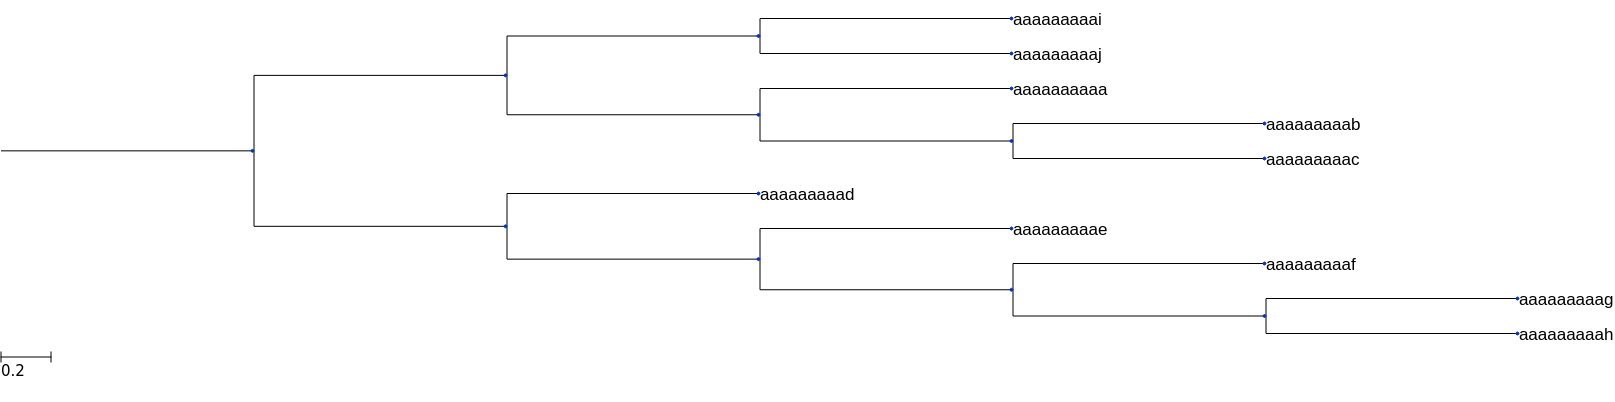

In [24]:
t = ete3.Tree()
t.populate(10)
t.render("%%inline", tree_style=ts)

In [29]:
%pylab inline

from __future__ import print_function, division
import matplotlib.pyplot as plt
from IPython.core import page
page.page = print
import networkx as nx
import pandas as pd
from skbio import DNA, TabularMSA
import skbio.io
from skbio.alignment import local_pairwise_align_ssw, global_pairwise_align_nucleotide

Populating the interactive namespace from numpy and matplotlib


/home/pavel/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random', 'e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [28]:
from qiime_default_reference import get_reference_sequences
import random

seqs_16s = []
fraction_to_keep = 0.001
for e in skbio.io.read(get_reference_sequences(), format='fasta', constructor=DNA):
    if random.random() < fraction_to_keep:
        seqs_16s.append(e)
print(len(seqs_16s))

99


In [34]:
from numpy import mean
from functools import partial

def cluster(seqs, similarity_threshold, cluster_fn, aligner=local_pairwise_align_ssw, verbose=False):
    clusters = []
    num_alignments = 0
    for query_seq in seqs:
        if verbose: print(query_seq.metadata['id'])
        clustered = False
        for i, cluster in enumerate(clusters, start=1):
            if verbose: print(" OTU %d" % i)
            clustered, alignment_results = cluster_fn(
                query_seq, cluster, similarity_threshold, aligner, verbose=verbose)
            num_alignments += len(alignment_results)
            if clustered:
                break
        if clustered:
            for n, s in alignment_results:
                cluster.add_node(query_seq.metadata['id'], seq=query_seq)
                cluster.add_edge(query_seq.metadata['id'], n, percent_similarity=s)
                # this is very inefficient, but need a way to retain order
                # for centroid clustering.
                # will come back to this...
                cluster.graph['node-order'].append(query_seq.metadata['id'])
            if verbose: print("Added to OTU")
        else:
            # create a new cluster containing only this node
            new_cluster = nx.Graph(id="OTU %d" % (len(clusters) + 1))
            new_cluster.add_node(query_seq.metadata['id'], seq=query_seq)
            # this is very inefficient, but need a way to retain order
            # for centroid clustering.
            # will come back to this...
            new_cluster.graph['node-order'] = [query_seq.metadata['id']]
            clusters.append(new_cluster)
            if verbose: print("Created OTU")
    return clusters, num_alignments


def furthest_neighbor(seq, cluster, similarity_threshold, aligner, verbose=False):
    alignment_results = []
    for node in list(cluster.nodes()):
        aln, _, _ = aligner(seq, cluster.node[node]['seq'])
        percent_similarity = 1. - aln[0].distance(aln[1])
        alignment_results.append((node, percent_similarity))
        if verbose: print("  ", node, percent_similarity)
        if percent_similarity < similarity_threshold:
            return False, alignment_results
    return True, alignment_results

def show_clusters(clusters, print_clusters=True, plot_clusters=True, plot_labels=False):
    G = nx.Graph()
    for c in clusters:
        G = nx.union(G, c)
        if print_clusters: print("%s: %s" % (c.graph['id'], [s for s in c.graph['node-order']]))
    if plot_clusters:
        pos=nx.spring_layout(G)
        nx.draw_networkx_nodes(G, pos, node_color='w')
        if G.number_of_edges() > 0:
            nx.draw_networkx_edges(G, pos)
        if plot_labels: nx.draw_networkx_labels(G, pos, labels={d:G.node[d]['seq'].metadata['id'] for d in G.nodes()})
        _ = plt.axis('off')

# For our toy example, we want our sequences to align from beginning to end
# so we'll penalize terminal gaps.
global_pairwise_align_nucleotide = partial(global_pairwise_align_nucleotide, penalize_terminal_gaps=True)

In [32]:
s1 = DNA('AAAAAAAAAA', {'id': 's1'})
s2 = DNA('AAAAATTTTT', {'id': 's2'})
s3 = DNA('AAAAAAACCA', {'id': 's3'})
s4 = DNA('CCCCAATTTT', {'id': 's4'})
s5 = DNA('ACCAAATTTT', {'id': 's5'})
s6 = DNA('AGGAAAAAAA', {'id': 's6'})

aln1 = TabularMSA([s1, s2, s3, s4, s5, s6])
print(aln1)

TabularMSA[DNA]
----------------------
Stats:
    sequence count: 6
    position count: 10
----------------------
AAAAAAAAAA
AAAAATTTTT
...
ACCAAATTTT
AGGAAAAAAA


s1
Created OTU
s2
 OTU 1
   s1 0.5
Created OTU
OTU 1: ['s1']
OTU 2: ['s2']


/home/pavel/anaconda3/lib/python3.6/site-packages/skbio/alignment/_pairwise.py:599: EfficiencyWarning: You're using skbio's python implementation of Needleman-Wunsch alignment. This is known to be very slow (e.g., thousands of times slower than a native C implementation). We'll be adding a faster version soon (see https://github.com/biocore/scikit-bio/issues/254 to track progress on this).
  "to track progress on this).", EfficiencyWarning)


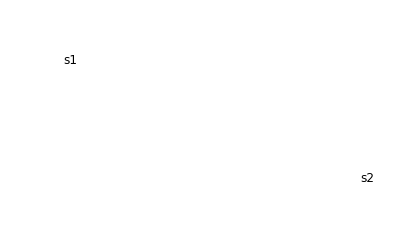

In [35]:
clusters, num_alignments = cluster([s1, s2], 0.70,
                                   furthest_neighbor, aligner=global_pairwise_align_nucleotide, verbose=True)
show_clusters(clusters, plot_labels=True)